In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Prati\Downloads\spam.csv" , encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [5]:
df.shape

(5572, 5)

In [6]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3' ,'Unnamed: 4'])

In [7]:
df = df.rename(columns={'v1':'Target' , 'v2':'Text'})

In [8]:
df.head()


,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df['Target'] = le.fit_transform(df['Target'])

In [12]:
# Removing Null And DUplicates

In [13]:
df.isnull().sum() # No NulL values

Target    0
Text      0
dtype: int64

In [14]:
# Duplicates
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates()

In [16]:
# df

In [17]:
df.shape

(5169, 2)

## EDA


In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['Target'].value_counts()  # 0 => Ham , 1=> Spam

Target
0    4516
1     653
Name: count, dtype: int64

<Axes: ylabel='count'>

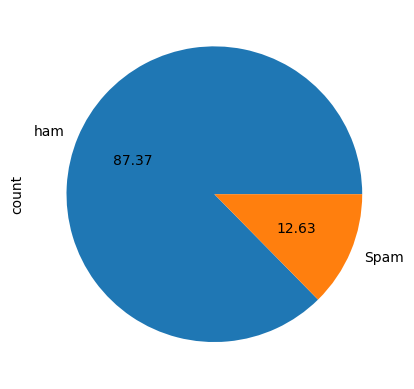

In [20]:
df['Target'].value_counts().plot(kind='pie', labels=['ham','Spam'] ,  autopct='%0.2f' )

In [21]:
# Data Is Imbalanced

In [22]:
df['num_of_char'] = df['Text'].apply(len)

In [23]:
df

,Target,Text,num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [24]:
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# df = df.drop(columns=['tokens'])

In [28]:
# df[']

In [29]:
df['num_of_words'] = df['Text'].apply(lambda x:len(word_tokenize(x)))

In [30]:
df['num_of_sent'] = df['Text'].apply(lambda x:len(sent_tokenize(x)))

In [31]:
df.head()

,Target,Text,num_of_char,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


C:\Users\Prati\anaconda3\envs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prati\anaconda3\envs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prati\AppData\Local\Temp\ipykernel_22540\2643470916.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


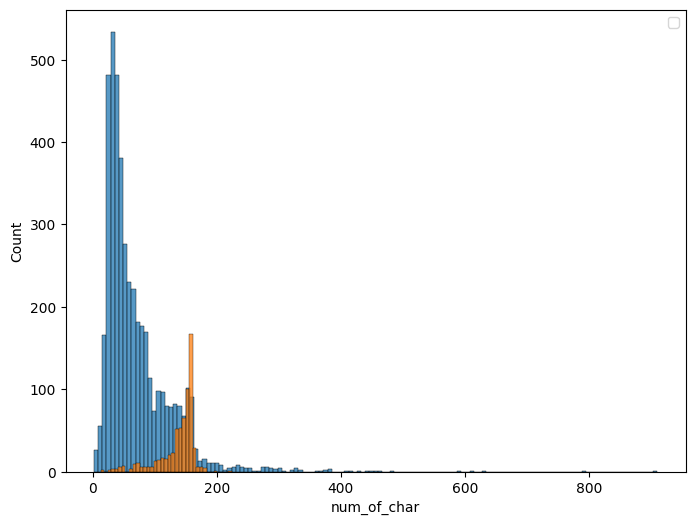

In [32]:
plt.figure(figsize=(8,6))
sb.histplot(df[df['Target'] == 0]['num_of_char'])
sb.histplot(df[df['Target'] == 1]['num_of_char'])
plt.legend()

C:\Users\Prati\anaconda3\envs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prati\anaconda3\envs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prati\AppData\Local\Temp\ipykernel_22540\2955210581.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


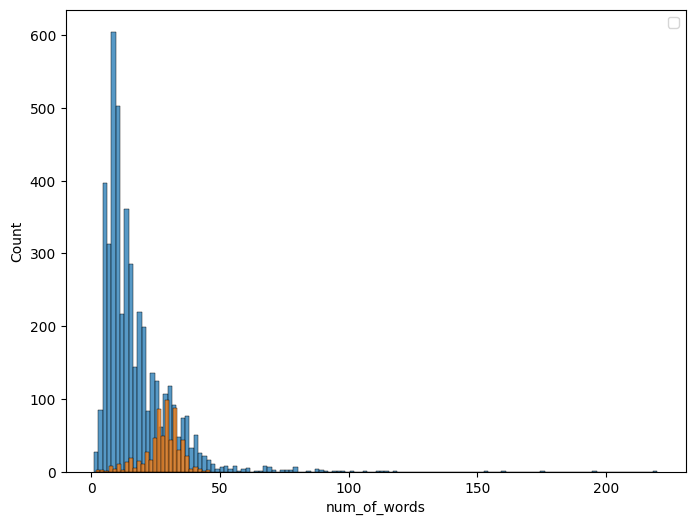

In [33]:
plt.figure(figsize=(8,6))
sb.histplot(df[df['Target'] == 0]['num_of_words'])
sb.histplot(df[df['Target'] == 1]['num_of_words'])
plt.legend()

C:\Users\Prati\anaconda3\envs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prati\anaconda3\envs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prati\anaconda3\envs\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


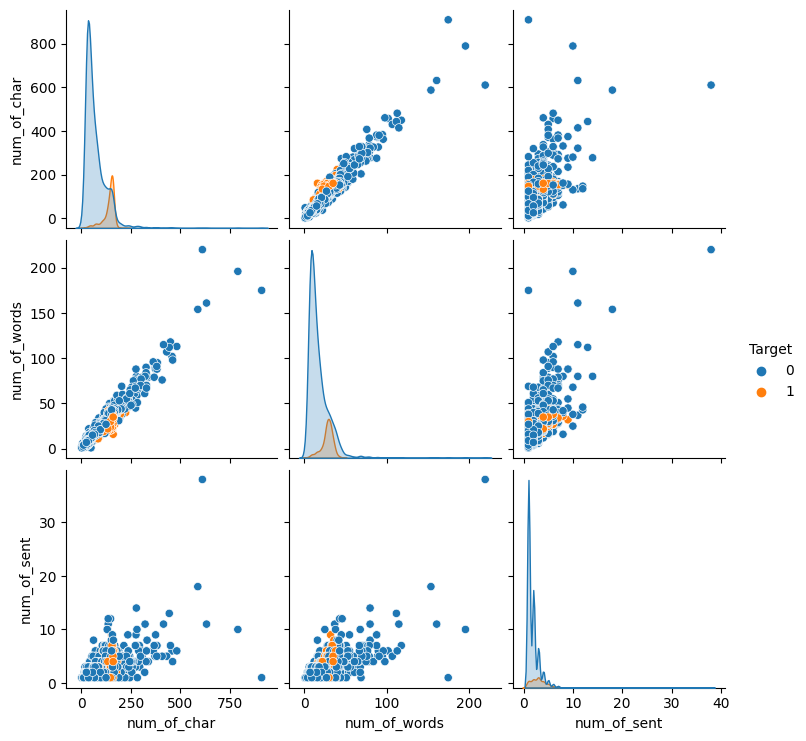

In [34]:
sb.pairplot(df , hue='Target')

In [35]:
Corr = df.drop(columns=['Text'])

<Axes: >

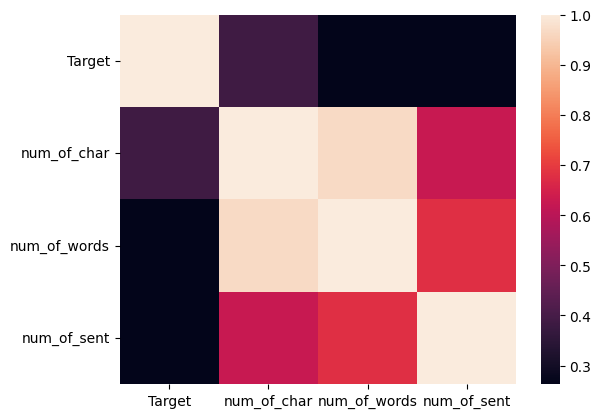

In [36]:
sb.heatmap(Corr.corr())

## Data Preprocessing 

In [90]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [94]:
ps = PorterStemmer()

In [97]:
ps.stem("loving")

'love'

In [84]:
# stopwords.words('english')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [105]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
            
    return ' '.join(y)
    

In [106]:
transform_text("Hello how are your M.r Newyork loving")

'hello newyork love'

In [107]:
df['Transform_text'] = df['Text'].apply(transform_text)

In [109]:
df.head()

,Target,Text,num_of_char,num_of_words,num_of_sent,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [112]:
from wordcloud import WordCloud

In [122]:
wc = WordCloud(width=500, height=500 ,   random_state=None,
    background_color='white',)

In [124]:
spam_wc = wc.generate(df[df['Target']==1]['Transform_text'].str.cat(sep=' '))

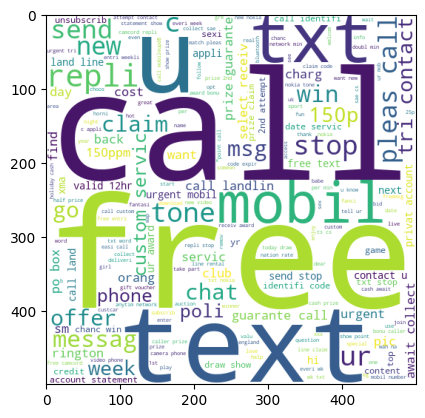

In [125]:
plt.imshow(spam_wc)

In [126]:
ham_wc = wc.generate(df[df['Target']==0]['Transform_text'].str.cat(sep=' '))


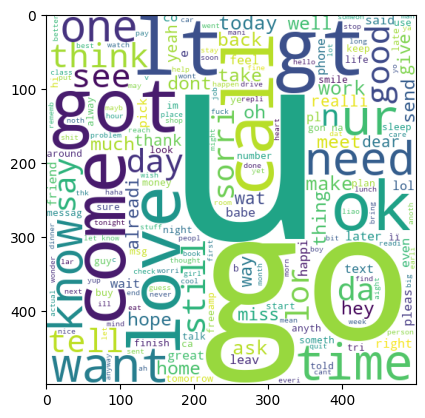

In [127]:
plt.imshow(ham_wc)

In [132]:
spam_corpus = []
for msg in df[df['Target']==1]['Transform_text']:
    # print(i)
    for i in msg.split():
        spam_corpus.append(i)

In [134]:
len(spam_corpus)

9939

In [139]:
df['spam_corpus'] = pd.DataFrame(spam_corpus)

<Axes: xlabel='spam_corpus'>

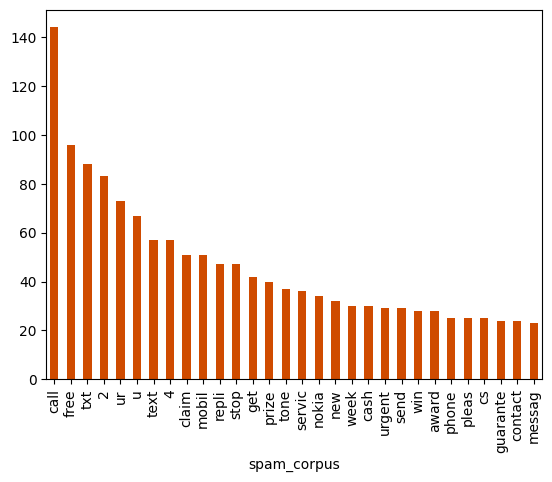

In [184]:
df['spam_corpus'].value_counts().head(30).plot(kind='bar',color='#CF4B00')

In [159]:
ham_corpus = []
for msg in df[df['Target']==0]['Transform_text']:
    for i in msg.split():
        ham_corpus.append(i)

In [162]:
df['ham_corpus'] = pd.DataFrame(ham_corpus)

<Axes: xlabel='ham_corpus'>

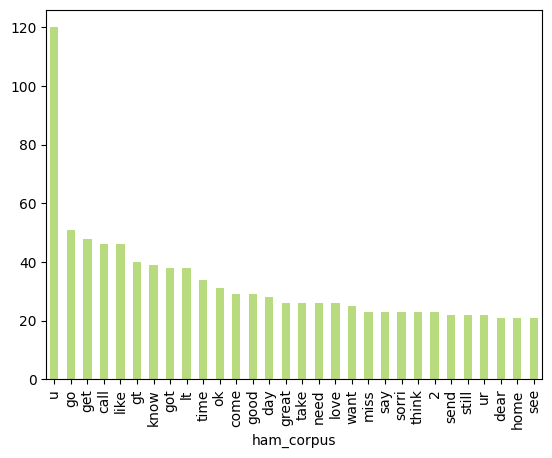

In [183]:
df['ham_corpus'].value_counts().head(30).sort_values(ascending=False).plot(kind='bar' , color='#B8DB80')

In [185]:
# Need to Convert text into Numeric
# Vectorization 

In [204]:
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [189]:
tfidf = TfidfVectorizer(max_features=3000)

In [194]:
X = tfidf.fit_transform(df['Transform_text']).toarray()

In [199]:
X.shape

(5169, 3000)

In [202]:
y = df['Target'].values

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)  

In [272]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

In [212]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [242]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
# print("Classification_report \n", classification_report(y_pred_gnb,y_test))
confusion_matrix(y_pred_gnb, y_test)

array([[788,  27],
       [108, 111]], dtype=int64)

In [236]:
accuracy_score(y_pred_gnb,y_test)

0.8694390715667312

In [237]:
precision_score(y_pred_gnb,y_test)

0.8043478260869565

In [246]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
# print("Classification_report \n", classification_report(y_pred_mnb,y_test))
confusion_matrix(y_pred_mnb, y_test)

array([[896,  30],
       [  0, 108]], dtype=int64)

In [247]:
accuracy_score(y_pred_mnb,y_test)

0.9709864603481625

In [248]:
precision_score(y_pred_mnb,y_test)

0.782608695652174

In [243]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
# print("Classification_report \n", classification_report(y_pred_bnb,y_test))
confusion_matrix(y_pred_bnb, y_test)

array([[895,  16],
       [  1, 122]], dtype=int64)

In [233]:
accuracy_score(y_pred_bnb,y_test)

0.9835589941972921

In [234]:
precision_score(y_pred_bnb,y_test)

0.8840579710144928

In [250]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [251]:
from sklearn.ensemble import VotingClassifier

In [262]:
voting_clf = VotingClassifier(
    estimators=[
        
        ('lor',LogisticRegression()),
        ('svc',SVC(probability=True)),
        ('mnb', MultinomialNB()),
        ('dt', DecisionTreeClassifier()),
        ('Kn', KNeighborsClassifier()),
        ('rf',RandomForestClassifier()),
        ('adb',AdaBoostClassifier()),
        ('Bag',BaggingClassifier()),
        ('ETC',ExtraTreesClassifier()),
        ('gb_clf',GradientBoostingClassifier())
    ],
    voting='soft'
    
    
    
    
)

In [263]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lor', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('mnb', MultinomialNB()),
                             ('dt', DecisionTreeClassifier()),
                             ('Kn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('adb', AdaBoostClassifier()),
                             ('Bag', BaggingClassifier()),
                             ('ETC', ExtraTreesClassifier()),
                             ('gb_clf', GradientBoostingClassifier())],
                 voting='soft')

In [264]:
y_pred_voting = voting_clf.predict(X_test)

In [265]:
y_pred_voting

array([0, 0, 0, ..., 0, 0, 0])

In [267]:
accuracy_score(y_pred_voting,y_test)

0.9758220502901354

In [269]:
precision_score(y_pred_voting,y_test)

0.8260869565217391

In [274]:
confusion_matrix(y_pred_voting, y_test)

array([[895,  24],
       [  1, 114]], dtype=int64)

In [275]:
## W'll be using only high precision Models

In [294]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [295]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [296]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [297]:
voting_pred = voting.predict(X_test)

In [299]:
accuracy_score(voting_pred,y_test)

0.9816247582205029

In [301]:
precision_score(voting_pred ,y_test) 

0.8695652173913043

In [305]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [306]:

from sklearn.ensemble import StackingClassifier

In [307]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [308]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [309]:
mnb = MultinomialNB()

In [311]:
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)

In [313]:
print("Accuracy",accuracy_score(y_test,mnb_pred))
print("Precision",precision_score(y_test,mnb_pred))

Accuracy 0.9709864603481625
Precision 1.0


In [315]:
import pickle

In [329]:
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))

In [318]:
pickle.dump(mnb,open('Mnb_model.pkl','wb'))

In [322]:
print("Classification_report: \n", classification_report(y_test,mnb_pred))

Classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [327]:
confusion_matrix(y_test,mnb_pred)

array([[896,   0],
       [ 30, 108]], dtype=int64)

<Axes: >

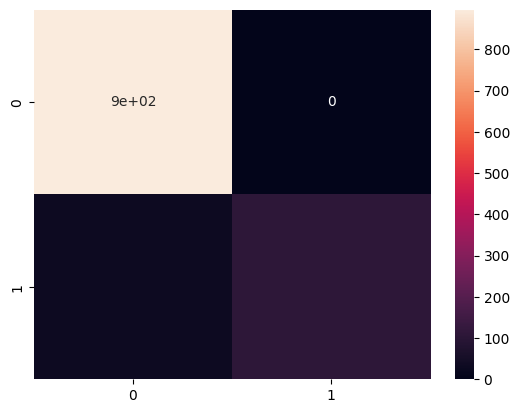

In [328]:
sb.heatmap(confusion_matrix(y_test,mnb_pred), annot=True)